<a href="https://colab.research.google.com/github/mariavanez/SIC25-ApuntesYClases/blob/main/Unidad%201%3A%20Introducci%C3%B3n%20a%20la%20Inteligencia%20Artificial/Cap%C3%ADtulo%201/3_An%C3%A1lisis_de_Datos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. ANÁLISIS DE DATOS BASADOS EN MACHINE LEARNING: PLANES Y PROCEDIMIENTOS**



---



## **1.1 Entendiendo el negocio y definiendo el problema**

> Este paso es como el **mapa inicial del viaje**. Si defines mal el problema, todo el proyecto (datos, modelos, resultados) se va a desviar. Por eso se insiste tanto en repetir, aclarar y redefinir.

- Máxima prioridad: **definir el problema.**

  * Antes de pensar en modelos de *machine learning*, lo más importante es tener claridad sobre qué problemas se quieren resolver.
  * Ejemplo: una empresa dice "queremos usar IA", pero eso no es un problema definido. El problema real puede ser: "queremos predecir qué clientes tienen mayor probabilidad de cancelar su suscripción".

- **Comprender el dominio del negocio.**

  * ¿Qué hace la organización?
  * ¿Cómo funciona su industria?
  * ¿Qué métricas son importantes? (ventas, retención, costos, etc). Esto se llama **domain knowledge** (conocimiento del dominio).

- **Redefinir y refinar el problema**

  * Se empieza con una definición inicial del problema.
  * Luego, se revisa, se reformula y se pregunta: *"¿este realmente es el objetivo?"*
  * Cada vez se obtiene una definición más clara y accionable.

- **Identificar datos y posibles soluciones**

  * ¿Qué datos necesitamos?
  * ¿Qué datos tenemos disponibles?
  * ¿Qué datos debemos recolectar?

En paralelo, esto abre la puerta a pensar en qué técnicas de machine learning podrían servir (clasificación, regresión, clustering, etc), aunque todavía no se decide definitivamente.



---



## **1.2 Recopilación de datos**

> Una vez que ya sabes **qué quieres resolver** (ejemplo: predecir la rotación de clientes), ahora toca **buscar los datos necesarios** para trabajar en la solución.

- **Fuentes de datos**

  * Datos internos (ya existentes en la empresa):
    * Bases de datos operacionales (ventas, clientes, inventario, etc)
    * Data warehouse (almacén e datos centralizado) o data mart (subconjunto especializado de datos).
    * Normalmente se consultan usando SQL.

  * Datos externos (si no basta con lo interno)
    * APIS → pedir datos a servicios externos (ejemplo: API de clima, API de Twitter/X).
    * Web Scraping → extraer datos de páginas web de forma automatizada.
    * Big data → si son datos muy grandes, se usan platafromas como Hadoop.

-  **Generar datos adicionales**

* Incluso si ya tienes datos, a veces se pueden crear nuevo a partir de los existentes:
  * Transformaciones (ejemplo: de la fecha de compra sacar variables como "día de la semana" o "temporada").
  * Combinación de fuentes (ejemplo: unir ventas con datos de clima para ver correlaciones).
  * Datos sintéticos (simulados) si faltan ejemplos.

- **La idea clave**

> Los algoritmos de machine learning son tan buenos como los datos que reciben. Por eso, esta fase es crítica: **sin datos correctos, no hay buen análisis posible.**



---



## **1.3 Preprocesamiento y búsqueda de datos**


- **¿Qué significa *preprocesamiento*?**
  * Es limpiar y preparar los datos para que un algoritmo de machine learning pueda usarlos. Los datos en bruto casi nunca están listos. Suelen tener errores, valores faltantes, duplicados, formatos distintos, etc.

  * Ejemplos de preprocesamiento:

    * Eliminar datos duplicados o inconsistentes.
    * Manejar valores nulos (rellenarlos, eliminarlos, imputarlos con promedios, etc).
    * Normalizar o escalar valores numéricos (ejemplo: qué precios en millones no opaquen a variables en decimales).
    * Codificar datos categóricos (ejemplo: convertir "Hombre/Mujer" en 0/1 o usar *one-hot encoding*).

- **Conversión de datos**
  * Una vez limpios, los datos deben transformarse a un **formato que entienda el algoritmo**.
  * Pasar texto a números (ejemplo: análisis de sentimientos con embeddings).
  * Pasar fechas a variables útiles (ejemplo: día de la semana, mes, si es festivo).
  * Reducir dimensionalidad (ejemplo: usar PCA para quedarte con las varibales más relevantes).

- **Búsqueda / Exploración de datos (EDA - Exploratory Data Analysis)**
  * Antes de entrenar modelos, **hay que exlorar los datos** para entenderlos:
    * Estadísticas descriptivas (promedios, medianas, desviaciones).
    * Visualizaciones (gráficas de dispersión, histogramas, correlaciones).
    * Detectar sesgos o distribuciones raras (ejemplo: 90% de clientes son hombres → puede sesgar el modelo).

- **Por qué es importante**
> Este paso suele ser el más largo y demandante en un proyecto ML. Los algoritmos pueden ser muy sofisticados, pero si los datos no están bien preparados, el modelo no funcionará bien (garbage in, garbage out).

Esta fase es como limpiar y organizar los ingredientes antes de cocinar. Si usas productos de mala calidad o mal preparados, el plato (el modelo) nunca saldrá bien.



---



### **Transformación de datos / NORMALIZACIÓN**

En la **transformación de datos**, la **normalización** es una técnica para **escalar los valores numéricos** de las variables de modo que queden dentro de un mismo rango (generalmente entre 0 y 1).

**¿Por qué se hace?**

* En los datos, algunas variables pueden tener valores **muy grandes** y otras **muy pequeños**.

  * Ejemplo:

    * “Edad” → valores entre 0 y 100.
    * “Ingresos” → valores entre 1000 y 100000.
* Si no se normaliza, el modelo puede darle **más importancia** a la variable con números grandes, aunque no sea lo más relevante.

**🔹 Fórmula de normalización (Min-Max Scaling)**

$$
x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

* `x` = valor original
* `x_min` = valor mínimo de la columna
* `x_max` = valor máximo de la columna
* Resultado siempre queda en el rango `[0, 1]`

**🔹 Ejemplo**

Supongamos que tenemos la columna **Edad**:

```
[18, 25, 40, 60]
```

* Min = 18
* Max = 60

Aplicando normalización:

$$
\text{Edad normalizada} = \frac{\text{Edad} - 18}{60 - 18}
$$

Resultados:

* 18 → 0
* 25 → 0.1667
* 40 → 0.5238
* 60 → 1


**🔹 En Python con scikit-learn**

In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Ejemplo de DataFrame
df = pd.DataFrame({'Edad': [18, 25, 40, 60]})

scaler = MinMaxScaler()
df[['Edad_normalizada']] = scaler.fit_transform(df[['Edad']])

print(df)

   Edad  Edad_normalizada
0    18          0.000000
1    25          0.166667
2    40          0.523810
3    60          1.000000


✅ **Resumen:** La **normalización** ajusta los valores de las variables numéricas a un rango común (usualmente \[0,1]) para que todos los atributos tengan un peso comparable en los modelos de machine learning.

---

### **Transformación de datos / DISTRIBUCIÓN NORMAL**

**La distribución normal (o “curva de campana”)**

> Es un tipo de distribución estadística donde los datos se concentran alrededor de un valor medio y se dispersan simétricamente hacia ambos lados.

- Imagina un gráfico en forma de campana:

  * La mayoría de los valores están cerca de la media.
  * Muy pocos valores son extremadamente bajos o altos.
  * Es simétrica (el lado izquierdo es el espejo del derecho).

**🔹 Propiedades importantes**

- Media (μ), mediana y moda son iguales.

- La forma depende de la desviación estándar (σ):

  * σ pequeña → curva más estrecha (datos muy agrupados).
  * σ grande → curva más ancha (datos más dispersos).

Aproximadamente:
- 68% de los datos está entre μ ± 1σ.
- 95% entre μ ± 2σ.
- 99.7% entre μ ± 3σ.

**🔹 Ejemplo en datos**

Supongamos que medimos la estatura de 1000 personas:

- Media = 170 cm
- σ = 10 cm
→ La mayoría tendrá entre 160 y 180 cm, y muy pocos medirán menos de 150 o más de 190.

Eso suele generar una distribución normal.

**📊 En transformación de datos**

Cuando hablamos de distribución normal en preprocesamiento:

- Algunos algoritmos de ML (como regresión lineal, k-means, PCA) funcionan mejor si las variables tienen una forma de distribución “cercana” a la normal.

- Si los datos están muy sesgados (ej: ingresos, donde la mayoría gana poco y unos pocos muchísimo), se suelen aplicar transformaciones (logarítmica, raíz cuadrada, Box-Cox, Yeo-Johnson) para que la variable se parezca más a una normal.

**🔹En Python: ver si los datos siguen una distribución normal:**

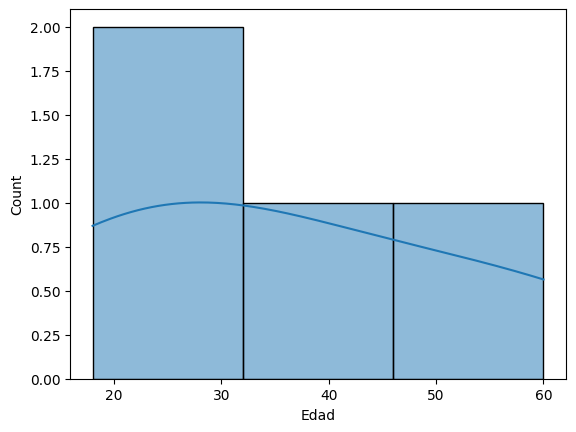

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo: supongamos una columna "edad"
sns.histplot(df['Edad'], kde=True)
plt.show()

**✅ En resumen:**

La distribución normal es una forma muy común en que se distribuyen los datos (curva de campana). En ML, se busca a veces que las variables estén más “normalizadas” hacia esa forma, porque ciertos algoritmos trabajan mejor así.

- **La transformación logarítmica** comprime valores grandes → útil en datos muy sesgados (ej: ingresos, precios).

- **La transformación raíz cuadrada** suaviza la asimetría → útil en datos de conteo.

Ambas ayudan a que los datos se parezcan más a una distribución normal (campana).

---



### **Transformación de datos / CATEGORIZACIÓN**

Dentro de la transformación de datos, la categorización (también llamada **discretización** o **binning**) es el proceso de **convertir una variable numérica continua en categorías o intervalos.**

¿Qué significa? → En vez de trabajar con valores numéricos exactos, agrupas esos valores en **rangos** o **clases**.

**🔹 Ejemplo con la edad (variable numérica):**

- En lugar de usar: `18, 22, 25, 30, 45, 60, 75`

- Puedes categorizarlos en:
  * Joven: 0–25
  * Adulto: 26–59
  * Mayor: 60+

> Así, una variable continua se transforma en una variable categórica.

📊 **¿Por qué se hace?**

- Facilita la interpretación. Ejemplo: “edad adulta” es más claro que “43 años”.
- Reduce ruido. Si no importa la diferencia exacta, los grupos simplifican.
- Modelos no lineales. Algunos algoritmos funcionan mejor con categorías discretas.
- Preparar datos para reglas o análisis descriptivo.

**🔹 Ejemplo en Python**

In [7]:
import pandas as pd

# Columna de edades
df = pd.DataFrame({'edad': [18, 22, 25, 30, 45, 60, 75]})

# Definimos los intervalos y etiquetas
bins = [0, 25, 59, 100]
labels = ['Joven', 'Adulto', 'Mayor']

# Categorizamos
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels)

print(df)

   edad grupo_edad
0    18      Joven
1    22      Joven
2    25      Joven
3    30     Adulto
4    45     Adulto
5    60      Mayor
6    75      Mayor


**✅ Resumen:**

La categorización es transformar variables numéricas continuas en intervalos o grupos (ej: convertir “edad = 45” en “Adulto”). Se usa para simplificar, interpretar mejor y, en algunos casos, mejorar el desempeño de los modelos.

---


### **Transformación de datos / MUESTREO**

En transformación de datos, el **muestreo** es el proceso de **seleccionar una parte representativa de los datos originales** para trabajar con ella, en lugar de usar todo el conjunto.

**¿Por qué se hace muestreo?**

- Reducir tamaño: a veces los datos son muy grandes y no es práctico procesarlos completos.

- Acelerar el entrenamiento: entrenar un modelo con millones de filas puede ser lento.

- Evitar sesgos: si el muestreo es bien hecho, la muestra conserva las mismas características del conjunto total.

- Validación y pruebas: se pueden separar datos en train/test mediante muestreo.

**Tipos de muestreo más comunes**

  * **Aleatorización simple (muestreo aleatorio simple)**

    * Seleccionas los datos al azar de todo el conjunto.

    * Todos los elementos tienen la misma probabilidad de ser elegidos.

👉 Ejemplo: si tienes 1000 registros, y quieres 100, tomas 100 filas al azar.

In [9]:
df_sample = df.sample(n=5, random_state=42)

  * Muestreo sistemático

    * Seleccionas cada k-ésimo elemento después de elegir un punto inicial al azar.

    * Es más ordenado que el aleatorio simple.

👉 Ejemplo: tienes 1000 personas, quieres 100 → eliges una persona al azar entre las primeras 10 y después tomas cada décima persona.

  * Aleatorización estratificada (muestreo estratificado)

    * Divides los datos en estratos (grupos homogéneos) según una variable (ej: género, región, edad).

    * Luego seleccionas una muestra aleatoria dentro de cada estrato en proporción al tamaño del grupo.

👉 Ejemplo: en un dataset con 70% mujeres y 30% hombres → tu muestra también debe mantener 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


* **Muestreo por conglomerados**

  * Se divide la población en conglomerados (grupos grandes heterogéneos).

  * Luego se seleccionan algunos conglomerados completos al azar para analizar.

👉 Ejemplo: en vez de elegir estudiantes individuales de todo un país, seleccionas ciertas escuelas completas al azar y trabajas con todos sus alumnos.

* **Muestreo multietápico**

  * Es una combinación de los anteriores.

  * Primero se eligen conglomerados, luego dentro de ellos se hace muestreo estratificado o aleatorio simple.

👉 Ejemplo:

- Seleccionas 3 ciudades al azar (conglomerados).

- Dentro de cada ciudad, seleccionas barrios al azar (segunda etapa).

- Dentro de cada barrio, seleccionas personas aleatoriamente (tercera etapa).

**✅ Resumen:**

- Aleatorio simple: todos tienen la misma chance.

- Sistemático: cada k-ésimo dato.

- Estratificado: respetando proporciones de grupos.

- Conglomerados: se eligen grupos enteros.

- Multietápico: mezcla de métodos, en varias fases.



---



### **Transformación de datos / REDUCCIÓN DE DIMENSIONALIDAD**

En **transformación de datos**, la **reducción de dimensionalidad** es el proceso de **reducir el número de variables (características, columnas) de un dataset**, manteniendo la mayor cantidad posible de información relevante.

**¿Por qué se usa?**

* En machine learning, a veces tenemos **muchas variables** (decenas, cientos o miles).
* Esto trae problemas como:

  * **Ruido** (variables irrelevantes que confunden al modelo).
  * **Sobreajuste (overfitting)** (el modelo aprende detalles innecesarios).
  * **Costos computacionales altos** (más columnas = más memoria y más tiempo).
* La reducción de dimensionalidad simplifica los datos → el modelo aprende más rápido y generaliza mejor.

**🔹 Métodos comunes**

1. **Selección de características (Feature Selection):**

   * Se eligen solo las variables más importantes.
   * Ejemplo: quedarse con las 10 características más correlacionadas con la variable objetivo.

2. **Extracción de características (Feature Extraction):**

   * Se transforman varias variables en otras nuevas que resumen la información.
   * Ejemplo clásico: **PCA (Análisis de Componentes Principales)**.

**📊 Ejemplo intuitivo**

Imagina que quieres predecir si una persona está saludable:

* Dataset original: 50 variables (altura, peso, presión arterial, colesterol, etc.).
* Muchas se parecen (altura y peso → IMC).
* Con reducción de dimensionalidad, puedes combinar esas variables en **componentes principales** que concentran la información.
* Así pasas de 50 columnas → 5 o 10 más representativas.

**🔹 PCA (Principal Component Analysis)** en breve

* Busca “nuevas variables” llamadas **componentes principales**.
* Cada componente es una combinación de las originales.
* Ordena los componentes según cuánta **varianza** (información) explican.
* Te quedas con los primeros, que explican la mayor parte de los datos.

En Python:




In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar datos primero
X_scaled = StandardScaler().fit_transform(X)

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Ahora `X_pca` tiene solo 2 columnas, pero concentra gran parte de la información original.

✅ **Resumen:**

La **reducción de dimensionalidad** es una técnica de transformación que **reduce el número de variables** en un dataset, eliminando redundancia y ruido, para hacer el análisis más rápido, visual y eficiente. Se logra con:

* **Selección de características** (mantener las más importantes).
* **Extracción de características** (crear nuevas variables que resuman la información, como en PCA).

---

### **Transformación de datos / COMPRESIÓN DE DATOS DE SEÑAL**

Cuando hablamos de transformación de datos, la **compresión de datos de señal** se refiere a reducir la cantidad de información que ocupa una señal (audio, imagen, video, sensores, etc.), pero intentando mantener la información esencial.

**¿Qué es una señal?**

En ciencia de datos, una señal es cualquier información que varía con el tiempo o el espacio:

- Audio: voz, música.

- Imágenes: fotos (señal bidimensional).

- Video: secuencia de imágenes.

- Sensores IoT: temperatura, vibración, presión, etc.

**¿Qué significa compresión de señal?**

Reducir la dimensionalidad o tamaño de la señal → ocupa menos espacio y se procesa más rápido.

Puede ser:

- Compresión sin pérdida (lossless): no se pierde información (ej: ZIP, FLAC, PNG).

- Compresión con pérdida (lossy): se elimina información menos importante para ahorrar espacio (ej: MP3, JPEG, MP4).

- Ejemplos en la práctica

  * Audio:
    * Una grabación de 1 minuto en crudo puede ocupar 10 MB.
    * Al comprimirla a MP3, puede bajar a 1 MB, eliminando frecuencias que el oído humano casi no percibe.
  
  * Imágenes:
    * Una foto en RAW pesa 20 MB.
    * Convertida a JPEG puede pesar 2 MB, quitando detalles imperceptibles.

  * Datos de sensores (IoT):
    * Si un sensor mide 1000 veces por segundo, se puede comprimir la señal eliminando redundancias o usando técnicas como Transformada de Fourier (FFT) para quedarte solo con las frecuencias relevantes.

**Técnicas comunes en compresión de señal**

- Transformada de Fourier (FFT): descompone la señal en frecuencias → se descartan las menos importantes.

- Transformada Wavelet (ondículas): analiza la señal en diferentes escalas (muy usada en imágenes y compresión de audio).

- Codificación Run-Length (RLE): guarda secuencias repetidas en forma compacta.

- Cuantización: reduce la precisión de los valores (ej: menos bits por píxel).

**✅ Resumen:**

La compresión de datos de señal es una técnica de transformación que reduce el tamaño de señales (audio, imágenes, video, sensores) para ahorrar espacio y acelerar el procesamiento. Puede ser:

- Sin pérdida: conserva toda la información.

- Con pérdida: elimina detalles poco relevantes para el ojo o el oído humano. Se logra mediante métodos como Fourier, Wavelets, cuantización y codificación.

---

## **1.4 Datos para el entrenamiento de modelos**

Ya teniendo los datos limpios y transformados, ahora se los damos al algoritmo para que aprenda patrones. Dependiendo del tipo de aprendizaje, este proceso cambia:

1. **Aprendizaje supervisado**

Aquí sí tenemos **etiquetas** (el valor que queremos predecir).

* Ejemplos:
  * Predecir si un cliente se irá (sí/no).
  * Estimar el precio de una casa (número).

* **Proceso:**
  * 1.- Divides los datos en dos o tres conjuntos:
    * Entrenamiento → el modelo aprende.
    * Validación (opcional, a veces se usa en validación cruzada).
    * Prueba / Evaluación → comprobar que tan bien funciona en datos nuevos.
  * 2.- Usas técnicas como validación cruzada ara asegurarte de que el modelo no se "memorice" los datos (overfitting).

2. **Aprendizaje no supervisado (autoaprendizaje)**

Aquí **no hay etiquetas**. El modelo no sabe qué buscar, solo **descubre patrones escondidos en los datos.**

* Ejemplos:
  * Agrupar clientes por comportamiento (clustering)
  * Reducir dimensiones para visualizar datos complejos.

No se habla de "entrenar con etiquetas", sino de **derivar estructuras o relaciones** entre los datos.

**🔹 Ejemplo práctico simple**

Supongamos que tenemos datos de clientes con edad, ingresos y si cancelaron o no su suscripción:

- Supervisado → usas las columnas (edad, ingresos) para predecir "canceló = sí/no".

- No supervisado → agrupas clientes en clusters: "jóvenes de bajos ingresos", "adultos con ingresos altos", etc, sin saber de antemano a qué grupo pertenecen.

**✅ Resumen:**

Este paso es donde el modelo **aprende**

- En **supervisado**, aprende a predecir una respuesta conocida.
- En no supervisado, aprende a encontrar patrones que nadie se los diga.

---




## **1.5 Evaluación del rendimiento del modelo**

Un modelo de ML puede aprender demasiado bien los datos de entrenamiento (**overfitting**), pero fallar con datos nuevos.

Para evitar esto, se usan **conjuntos de evaluación (test set)** o **validación cruzda**, que ayudan a medir qué tan bien generaliza el modelo.

- **Evaluación en aprendizaje supervisado**
  * Aquí sí tenemos etiquetas reales, así que podemos medir qué tan cerca está la predicción del modelo.
    * Clasificación (ejemplo: "este correo es spam o no?")
    * Precisión (accuracy), Recll, F1-score, Matriz de confusión, AUC-ROC.
    * Regresión (ejemplo: predecir el precio de una casa):
      * Error cuadrático medio (MSE), Error absoluto medio (MAE), R².

- **Evaluación en aprendizaje no supervisado (autoaprendizaje)**
  * Aquí no hay etiquetas, por lo que no se puede medir "qué tan correcto" es el resultado.
  * En su lugar, se usan:
    * **Medidas estadísticas** → varianza explicada, inercia (en clustering)
    * **Índices de validación interna** → Silhoutte score (qué tan separados están los clusters).
    * **Interpretación de reglas o patrones** → el analista valida si los grupos o asociaciones tienen sentido en el contexto del negocio.

**🔹 Ejemplo práctico simple**

Supongamos que entrenamos un modelo para predecir si un cliente cancelará la suscripción:

- El entrenamiento obtuvo **98% de accuracy**, pero en los datos de prueba bajó a un 70% → el modelo **sobreajustó**.

- Si en vez de supervisado, usamos un clustering (no supervisado), evaluaríamos si los grupos formados de clientes realmente diferencian comportamientos útiles (ejemplo: "jóvenes de bajos ingresos" vs. "adultos de ingresos altos").

**✅ Resumen:**

La evaluación del modelo es como el examen final:

- En supervisado, comparamos predicciones contra la "respuesta correcta".

- En no supervisado, juzgamos la calidad de los aptrones encontrados con métricas estadísticas o interpretación de negocio.

---

## **1.6 Mejorar el rendimiento del modelo y la aplicación al mercado**

- **El problema no se resuelve en un solo intento**
  * La primera versión del modelo rara vez es la mejor.
  * Normalmente, los resultados iniciales sirven como **punto de partida**.
  * Después comienza un proceso de **iteración y ajuste**.

- **Mejorar el rendimiento del modelo**
  * **Ajustes de parámetros (Hyperparameter Tuning)**
    * Ejemplo: en un árbol de decisión, cambiar la profundidad máxima o el número de hojas.
    * Se hace con técnicas como **Grid Search** o **Random Search**
  * **Probar otros algoritmos**
    * Ejemplo: si una regresión logística no predice bien, probar con un Random Forest o XGBoost.
  * **Ingeniería de características (Feauture Engineering)**
    * Crear nuevas variables a partir de las existentes.
    * Ejemplo: en vez de usar solo la fecha, crear "día de la semana", "es fin de mes", etc.
  * **Más y mejores datos**
    * A veces el problema no es el algoritmo, sino los datos.
    * Recolectar más ejemplos o datos más limpios puede mejorar mucho el rendimiento.

- **Juzgar el rendimiento del modelo**
  * No existe un **criterio absoluto** de cuándo un modelo es "suficientemente bueno".
  * Depende del contexto del negocio:
    * En medicina, un 90% de precisión puede ser insuficiente.
    * En marketing, un 70% podría ser aceptable si genera valor.

- **Aplicar el modelo al mercado**
  * Cuando el modelo es **satisfactorio**, se puede:
    * Integrar un **sistema de producción** (ejemplo: que la app de un banco use el modelo para detectar fraudes en tiempo real).
    * Automatizar procesos (ejemplo: recomendaciones de productos en un e-commerce).
    * Hacer un **despliegue piloto** → probar un grupo reducido antes de usarlo masivamente.
  
  * En alguno casos se necesita desarrollo adicional:
    * APIS para que otros sistemas usen el modelo.
    * Interfaz de usuario.
    * Escalado en la nube para manejar muchos datos en tiempo real.

**✅ Resumen:**

Este paso es un ciclo de **iterar, comparar, ajustar y mejorar** hasta que el modelo sea útil en el negocio. Luego se **despliega** para resolver el problema real.

---

##